In [40]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read dataset 
salaries_data = pd.read_csv("../data/salaries_data.csv")
salaries_data.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [3]:
# rows and columns 
print(f"This dataset has {salaries_data.shape[0]} rows and {salaries_data.shape[1]} columns.")

This dataset has 397 rows and 7 columns.


In [4]:
# Drop the `Unnamed: 0`
salaries_data = salaries_data.drop(salaries_data.columns[0], axis=1)

salaries_data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
# rows and columns 
print(f"This dataset has {salaries_data.shape[0]} rows and {salaries_data.shape[1]} columns.")

This dataset has 397 rows and 6 columns.


In [6]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
salaries_data.columns = (
    salaries_data.columns
    .str.lower()
    .str.replace(".", "_")
    .str.replace(" ", "_")
    .str.strip()
)

salaries_data.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
# since rank is a function in Pandas, will change the column name to a more descriptive name
salaries_data = salaries_data.rename(columns={"rank": "academic_rank"})

salaries_data.head()

,academic_rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [36]:
# check and handle missing values
salaries_data.isnull().sum()

academic_rank    0
discipline       0
yrs_since_phd    0
yrs_service      0
sex              0
salary           0
dtype: int64

In [ ]:
# save cleaned data
salaries_data.to_csv("../data/cleaned_salaries_data.csv", index=False)

In [9]:
salaries_data["academic_rank"].value_counts()

academic_rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64

In [10]:
salaries_data["discipline"].value_counts()

discipline
B    216
A    181
Name: count, dtype: int64

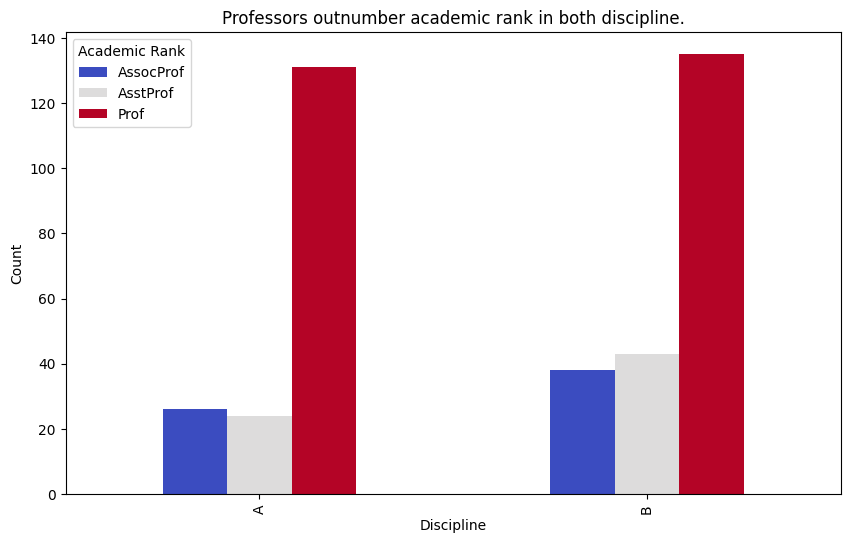

In [21]:
cross_tab = pd.crosstab(salaries_data["discipline"], salaries_data["academic_rank"])


cross_tab.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")

plt.title("Professors outnumber academic rank in both discipline.")
plt.xlabel("Discipline")
plt.ylabel("Count")
plt.legend(title="Academic Rank")

plt.show()

In [13]:
salaries_data.sex.value_counts()

sex
Male      358
Female     39
Name: count, dtype: int64

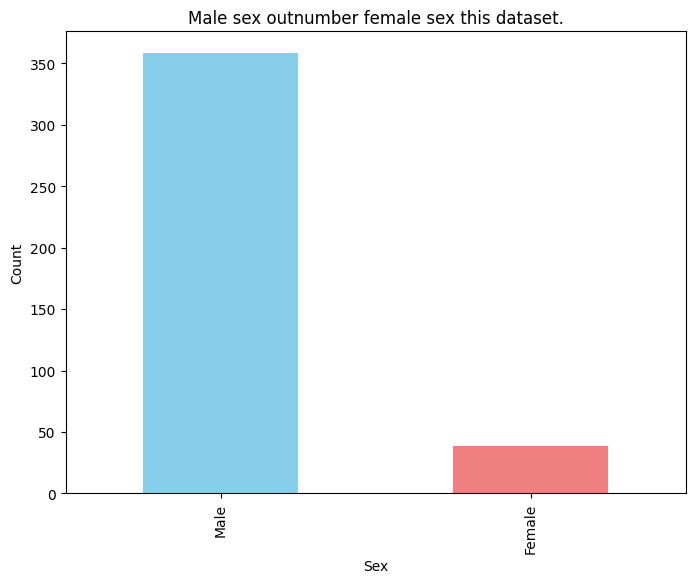

In [26]:
# exploring the sex attribute
sex_counts = salaries_data.sex.value_counts()

sex_counts.plot(kind="bar", figsize=(8, 6), color=["skyblue", "lightcoral"])

plt.title("Male sex outnumber female sex this dataset.")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show()

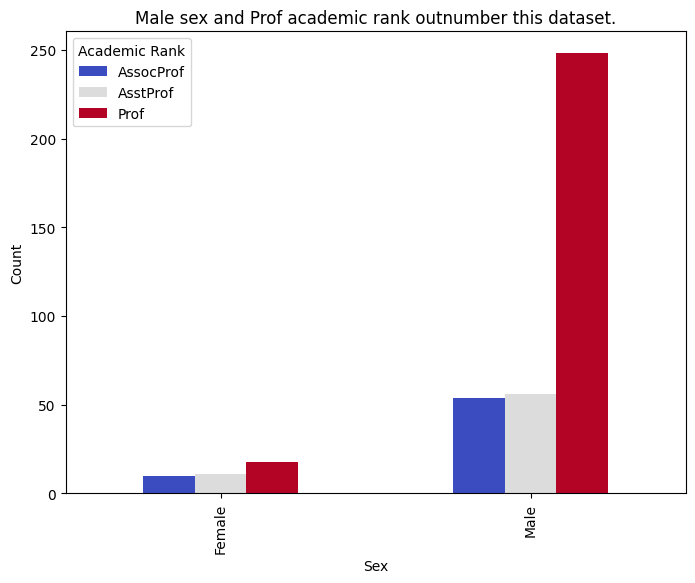

In [32]:
cross_tab = pd.crosstab(salaries_data["sex"], salaries_data["academic_rank"])


cross_tab.plot(kind="bar", figsize=(8, 6), colormap="coolwarm")

plt.title("Male sex and Prof academic rank outnumber this dataset.")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Academic Rank")

plt.show()

In [12]:
salaries_data.describe()

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


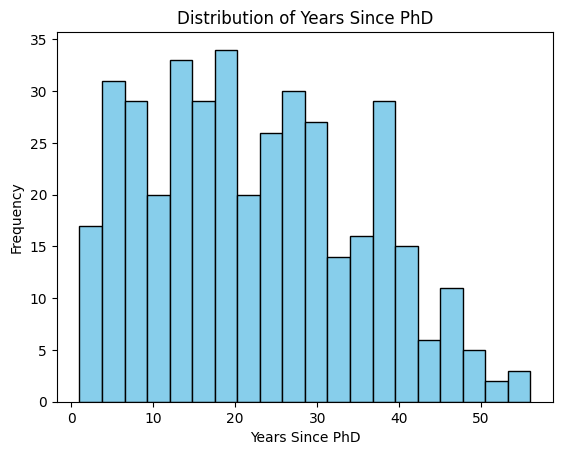

In [28]:
# years since phd distribution
salaries_data.yrs_since_phd.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")

plt.title("Distribution of Years Since PhD")
plt.xlabel("Years Since PhD")
plt.ylabel("Frequency")

plt.show()

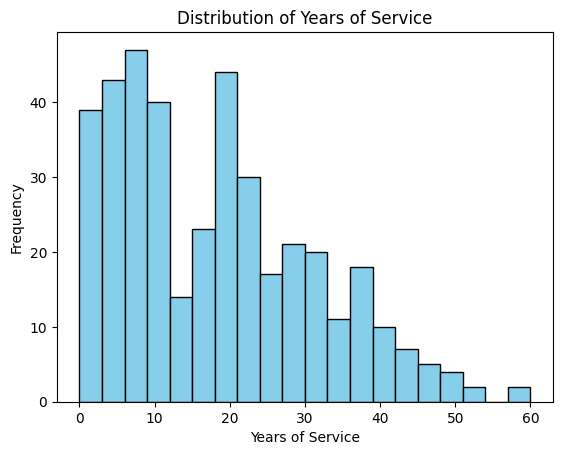

In [29]:
# years of service distribution
salaries_data.yrs_service.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")

plt.title("Distribution of Years of Service")
plt.xlabel("Years of Service")
plt.ylabel("Frequency")

plt.show()

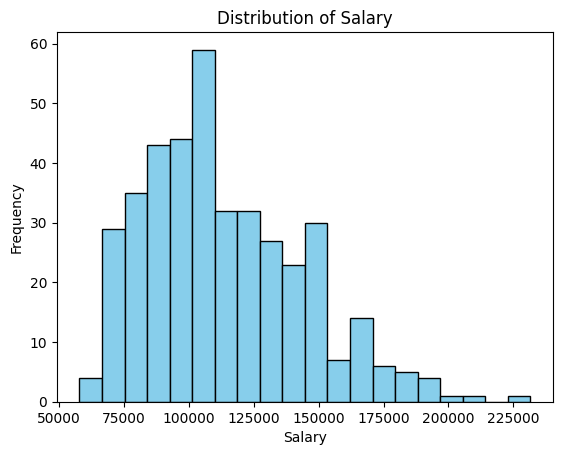

In [30]:
# salary distribution
salaries_data.salary.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")

plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.show()

In [34]:
# correlation matrix 
correlation_matrix = salaries_data[["yrs_since_phd", "yrs_service", "salary"]].corr()

print(correlation_matrix)

               yrs_since_phd  yrs_service    salary
yrs_since_phd       1.000000     0.909649  0.419231
yrs_service         0.909649     1.000000  0.334745
salary              0.419231     0.334745  1.000000


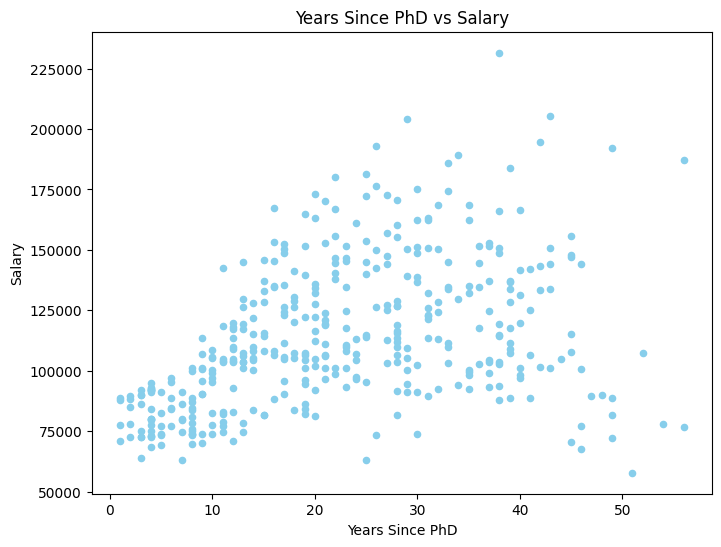

In [ ]:
# Years Since PhD vs Salary Scatter plot
salaries_data.plot(kind="scatter", x="yrs_since_phd", y="salary", figsize=(8, 6), color="skyblue")

plt.title("Years Since PhD vs Salary")
plt.xlabel("Years Since PhD")
plt.ylabel("Salary")

plt.show()

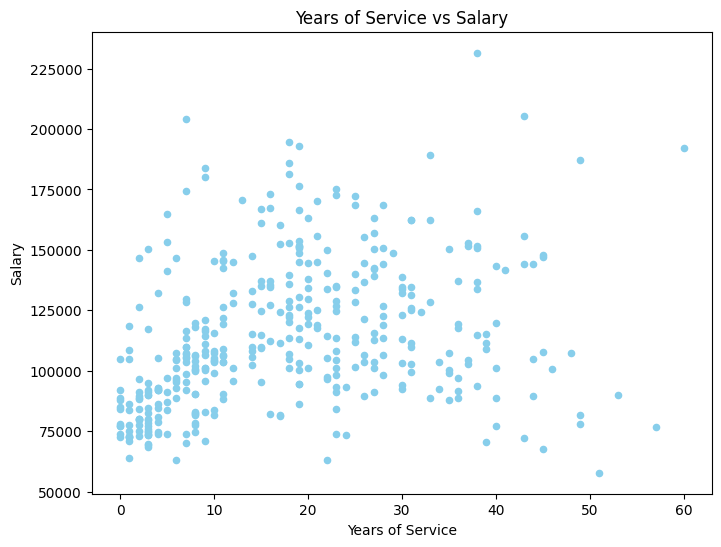

In [39]:
# Years of Service vs Salary Scatter Plot
# Scatter plot
salaries_data.plot(kind="scatter", x="yrs_service", y="salary", figsize=(8, 6), color="skyblue")

plt.title("Years of Service vs Salary")
plt.xlabel("Years of Service")
plt.ylabel("Salary")

plt.show()